In this iPython notebook, I will go over the data cleaning and exploration process to prepare the Olympics Medal Count dataset for visualization with d3

There are a number of steps that are involved in creating a final visualization. I first read in the data, do some preliminary data cleaning, and then go back and forth between transforming and visualizing until I reach a final product. As one gets closer and closer to the final product, the types of tools used will be less agile and allow for additional detail fine-tuning.

# Reading in the data

In [24]:
%cd ~/Google\ Drive/Datasets/

/Users/rowan/Google Drive/Datasets


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import image
import brewer2mpl



# Set up some better defaults for matplotlib
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

rcParams['figure.figsize'] = (14, 10)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks

    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)

    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()


In [26]:
%matplotlib inline

In [27]:

olympic_medalists_file = 'Summer Olympic medallists 1896 to 2008 - ALL MEDALISTS.csv'


df = pd.read_csv(olympic_medalists_file, sep=',') 


df.rename(columns={'Edition': 'Year'}, inplace=True)

df.head()

,City,Year,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


# Data Exploration

This is a rich data set. The first thing that jumps out at me, though, is the gender column. Let's take a look at the gender data and create some visualizations before formulating the question we are hoping to answer in our final visualization.

In [28]:
gender_counts = df['Gender'].value_counts()
gender_counts

Men      21721
Women     7495
dtype: int64

In [29]:
df['Event_gender'].value_counts()

M    20067
W     7278
X     1871
dtype: int64

It seems that there are some differences across the two gender columns. The 'Gender' column appears to be the most complete of the two, so we will proceed with that one.

In [30]:
gender_group = df.groupby('Gender')
gender_group.size()

Gender
Men      21721
Women     7495
dtype: int64

In [31]:
gender_counts_df = pd.DataFrame(gender_counts, columns=['Number of Medals'])

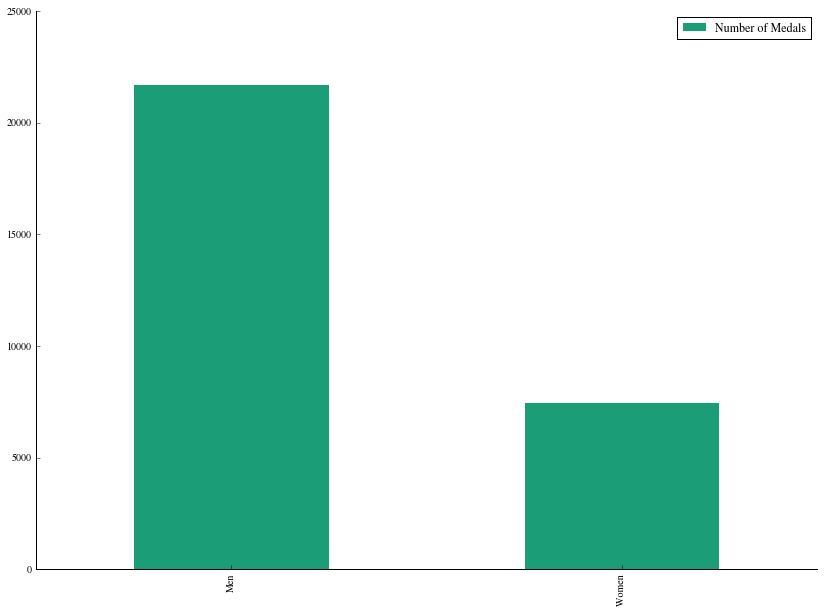

In [36]:

rcParams['figure.figsize'] = (14, 10)
fig = gender_counts_df.plot(kind='bar')
remove_border()


Interesting! It seems that there is a significant differenc in the number of medals available to men vs. women. I think that it would be interesting take a look at this difference over time, and see how the gender breakdown has evolved over the Olympics'  lifespan.

# Generating Our Intermediary Visualization

In [33]:
year_and_gender = df.groupby(['Year', 'Gender'])

year_and_gender_df = pd.DataFrame(year_and_gender.size(), columns=['Medal Count'])
year_and_gender_df['Year'] = year_and_gender_df.index.get_level_values('Year')
year_and_gender_df['Gender'] = year_and_gender_df.index.get_level_values('Gender')
year_and_gender_df = year_and_gender_df.reset_index(drop=True)

year_and_gender_df.head()



,Medal Count,Year,Gender
0,151,1896,Men
1,501,1900,Men
2,11,1900,Women
3,458,1904,Men
4,12,1904,Women


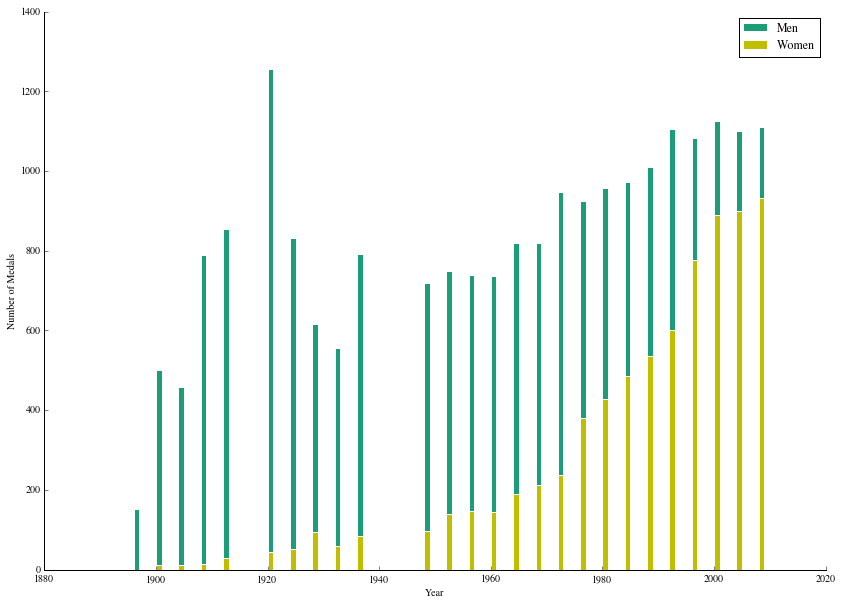

In [37]:
year_and_gender_men_df = year_and_gender_df.ix[year_and_gender_df['Gender'] == 'Men',]
year_and_gender_women_df = year_and_gender_df.ix[year_and_gender_df['Gender'] == 'Women',]

years = year_and_gender_df['Year']

x = np.arange(min(years), max(years), step=4)

y_men = year_and_gender_men_df['Medal Count']
y_women = year_and_gender_women_df['Medal Count'] 

width=1

fig, ax = plt.subplots()

rects1 = ax.bar(year_and_gender_men_df.Year, year_and_gender_men_df['Medal Count'], width=width)
rects2 = ax.bar(year_and_gender_women_df.Year, year_and_gender_women_df['Medal Count'], color='y', width=width)

ax.set_ylabel('Number of Medals')
ax.set_xlabel('Year')

ax.set

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

remove_border()

plt.show()


This visualization looks great. We can already see an interesting trend, as well as some interesting points on our graph. We can see the period of time when the Olympics did not happen due to the World Wars, as well as a spike in the medal count during 1920. I make a mental note to do some more research on these topics for our final visualization, and will now write our dataset to disk, which we will next be reading into d3 for our final visualization. 

# Writing our final, aggregate dataset

In [35]:
year_and_gender_df.to_csv('Year_and_Gender_Olympics_Dataset_All_Years.csv', index=False)